The pre-processing code is run at the start of the model building for easier access of variables.

(2193, 351)
0                  healthy
1                  healthy
2                  healthy
3                  healthy
4                  healthy
               ...        
2188    early stage cancer
2189    early stage cancer
2190    early stage cancer
2191    early stage cancer
2192    early stage cancer
Name: class_label, Length: 2193, dtype: object
class_label
early stage cancer        781
screening stage cancer    490
mid stage cancer          453
late stage cancer         409
healthy                    60
Name: count, dtype: int64
class_label
cancer     2133
healthy      60
Name: count, dtype: int64
[0 1]
Optimization terminated successfully.
         Current function value: 0.686134
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            class_label   No. Observations:                 2193
Model:                          Logit   Df Residuals:                     1843
Method:                           MLE   D

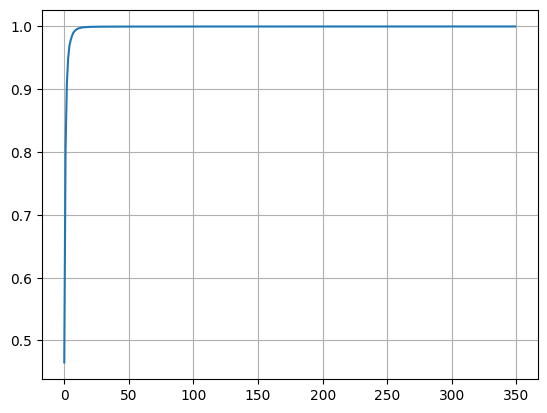

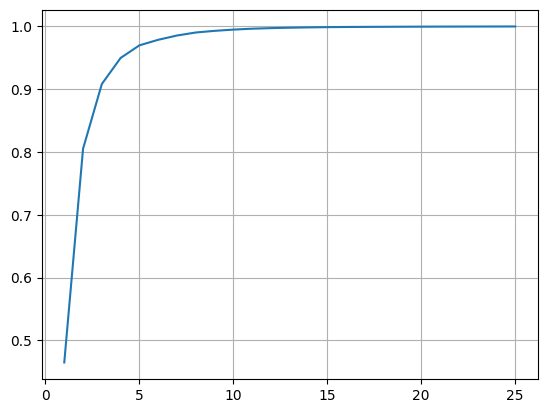

In [72]:
import pandas as pd
import numpy as np
%run HealthyvsCancer.ipynb

The RandomUnderSampler from the 'imblearn' package is used to randomly undersample the majority class, which is the proportion of the population with the cancer, such that the ratio of healthy to cancer is 1:1.

In [73]:
xvals_filtered = np.log(xvals_filtered)
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.6)
from imblearn.pipeline import Pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_over, y_over = pipeline.fit_resample(xvals_filtered, yvals_binary)

Gaussian Naive Bayes classifier is used, since the input variables are continuous. One assumption we make is that the values follow a normal distrubution. 

In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_over, y_over)
test_data = pd.read_csv('Test_Set.csv')
test_data['class_label'] = test_data['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
testX, testY = test_data.drop(['class_label'], axis=1), test_data['class_label']
testX_filtered = testX.drop(columns=drops_3)
testX_filtered = np.log(testX_filtered)
testX_over, testY_over = pipeline.fit_resample(testX_filtered, testY)
nb.score(testX_over, testY_over)

0.6515151515151515

The summary of the Gaussian Naive Bayes classifier is as shown below.

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = nb.predict(testX_over)
print(classification_report(testY_over, y_pred))
confusion_matrix(testY_over, nb.predict(testX_over))

              precision    recall  f1-score   support

           0       0.53      0.59      0.56        99
           1       0.74      0.69      0.71       165

    accuracy                           0.65       264
   macro avg       0.63      0.64      0.64       264
weighted avg       0.66      0.65      0.65       264



array([[ 58,  41],
       [ 51, 114]])